In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [2]:
mpl.rcParams['font.family'] = 'Malgun Gothic' # windows 맑은 고딕 한글 설정
mpl.rcParams['font.size'] = 13
mpl.rcParams['axes.unicode_minus'] = False

# 분석그래프 1

In [3]:
df1 = pd.read_csv("C:/Users/rlawl/Downloads/보건복지부_시군구별 치매현황_20220311.csv",encoding= 'CP949')

In [4]:
df1 =df1[df1['시점']==2022]

In [5]:
df1 = df1.reset_index()

In [6]:
df1 = df1.drop(columns = ['index'])

In [7]:
df1 =df1.drop(columns =['행정구역(기초)별'])

In [8]:
df1['행정구역(시도)별'].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [9]:
df1

,시점,행정구역(시도)별,성별,연령별,노인인구수,치매환자수,치매환자유병률,최경도 환자,경도 환자,중등도 환자,중증 환자,알츠하이머 환자수,알츠하이머 환자유병률,혈관성치매 환자수,혈관성치매 환자유병률,기타 환자환자수,기타 환자유병률,경도인지장애 환자수,경도인지장애 환자유병률
0,2022,전국,전체,60~64세,4157520.0,25482.0,0.61,4434.0,10549.0,6549.0,3950.0,0.0,0.00,25482.0,0.61,0.0,0.00,620678.0,14.92
1,2022,전국,전체,65~69세,3074784.0,42775.0,1.39,7443.0,17709.0,10993.0,6630.0,39895.0,1.29,0.0,0.00,2880.0,0.09,550628.0,17.90
2,2022,전국,전체,70~74세,2169887.0,83817.0,3.86,14584.0,34700.0,21541.0,12992.0,80409.0,3.70,2071.0,0.09,1336.0,0.06,469018.0,21.61
3,2022,전국,전체,75~79세,1591262.0,187547.0,11.79,32633.0,77644.0,48200.0,29070.0,77988.0,4.90,37191.0,2.33,72369.0,4.54,234632.0,14.74
4,2022,전국,전체,80~84세,1230829.0,257061.0,20.89,44729.0,106423.0,66065.0,39845.0,200005.0,16.24,9611.0,0.78,47445.0,3.85,588712.0,47.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2022,제주특별자치도,여,70~74세,13639.0,431.0,3.16,75.0,179.0,111.0,67.0,415.0,3.04,0.0,0.00,16.0,0.11,2526.0,18.52
392,2022,제주특별자치도,여,75~79세,11390.0,1567.0,13.76,273.0,649.0,403.0,243.0,728.0,6.39,95.0,0.83,744.0,6.53,2376.0,20.86
393,2022,제주특별자치도,여,80~84세,9775.0,2273.0,23.25,396.0,941.0,584.0,352.0,2058.0,21.05,34.0,0.34,181.0,1.85,4502.0,46.05
394,2022,제주특별자치도,여,85세이상,10302.0,3396.0,32.96,591.0,1406.0,873.0,526.0,2915.0,28.29,235.0,2.28,246.0,2.38,2395.0,23.24


In [10]:
df1 = df1[['행정구역(시도)별','연령별','성별','치매환자수','치매환자유병률']]

In [11]:
df1 =df1[df1['행정구역(시도)별']=='전국']

In [12]:
df1 = df1.drop(index = [0,1,2,3,4,5,6,7,14,21])

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 8 to 20
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   행정구역(시도)별  12 non-null     object 
 1   연령별        12 non-null     object 
 2   성별         12 non-null     object 
 3   치매환자수      12 non-null     float64
 4   치매환자유병률    12 non-null     float64
dtypes: float64(2), object(3)
memory usage: 576.0+ bytes


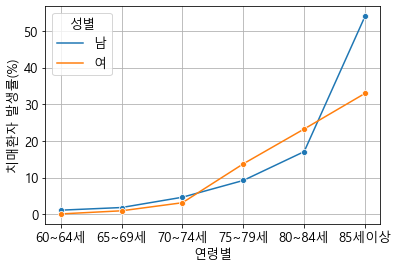

In [14]:

sns.lineplot(x="연령별", y="치매환자유병률",
             hue="성별",marker = "o",
             data=df1)
plt.ylabel("치매환자 발생률(%)")
plt.grid()

# 분석그래프 2

2021년 교통사고 사망 데이터를 이용 - 대분류, 중분류를 이용해 누적막대 그래프를 그리거나 원그래프를 중첩하여 그리는 방식으로 진행하기

In [15]:
df2 = pd.read_csv("C:/Users/rlawl/Downloads/도로교통공단_사망 교통사고 정보_20211231.csv",encoding= 'CP949')

In [16]:
df2.columns

Index(['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X(UTMK)',
       '발생위치Y(UTMK)', '경도', '위도'],
      dtype='object')

In [17]:
df2 = df2[['사망자수', '사고유형_대분류','사고유형_중분류']]

In [18]:
df2.info() # NaN 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816 entries, 0 to 2815
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   사망자수      2816 non-null   int64 
 1   사고유형_대분류  2816 non-null   object
 2   사고유형_중분류  2816 non-null   object
dtypes: int64(1), object(2)
memory usage: 66.1+ KB


In [19]:
df2

,사망자수,사고유형_대분류,사고유형_중분류
0,1,차대차,추돌
1,1,차량단독,공작물충돌
2,1,차대차,측면충돌
3,1,차대사람,횡단중
4,1,차대사람,기타
...,...,...,...
2811,1,차대차,정면충돌
2812,1,차대차,추돌
2813,1,차대사람,횡단중
2814,1,차대사람,횡단중


In [20]:
group_df2 = df2.groupby(['사고유형_대분류','사고유형_중분류']).count()

In [21]:
group_large = df2.groupby('사고유형_대분류').count()

In [22]:
group_large

,사망자수,사고유형_중분류
사고유형_대분류,,
차대사람,967,967
차대차,1182,1182
차량단독,667,667


In [23]:
group_df2

사망자수
사고유형_대분류 사고유형_중분류        
차대사람     기타           329
         길가장자리구역통행중    30
         보도통행중         21
         차도통행중        146
         횡단중          441
차대차      기타           240
         정면충돌         191
         추돌           355
         측면충돌         394
         후진중충돌          2
차량단독     공작물충돌        326
         기타           143
         도로이탈          84
         전도            81
         전복            30
         주/정차차량 충돌      3

In [24]:
group_df2.index[:]

MultiIndex([('차대사람',         '기타'),
            ('차대사람', '길가장자리구역통행중'),
            ('차대사람',      '보도통행중'),
            ('차대사람',      '차도통행중'),
            ('차대사람',        '횡단중'),
            ( '차대차',         '기타'),
            ( '차대차',       '정면충돌'),
            ( '차대차',         '추돌'),
            ( '차대차',       '측면충돌'),
            ( '차대차',      '후진중충돌'),
            ('차량단독',      '공작물충돌'),
            ('차량단독',         '기타'),
            ('차량단독',       '도로이탈'),
            ('차량단독',         '전도'),
            ('차량단독',         '전복'),
            ('차량단독',  '주/정차차량 충돌')],
           names=['사고유형_대분류', '사고유형_중분류'])

https://rfriend.tistory.com/412

In [25]:
group_names = group_large.index

In [26]:
group_sizes = group_large['사망자수'].values

In [27]:
group_sizes

array([ 967, 1182,  667], dtype=int64)

In [28]:
subgroup_names =[ '기타',  '차도통행중',        '횡단중',         '기타' ,'정면충돌',         '추돌',       '측면충돌',      '공작물충돌',         '기타',       '도로이탈',         '전도',         '전복']

In [29]:
subgroup_names

['기타',
 '차도통행중',
 '횡단중',
 '기타',
 '정면충돌',
 '추돌',
 '측면충돌',
 '공작물충돌',
 '기타',
 '도로이탈',
 '전도',
 '전복']

In [30]:
subgroup_sizes =  [380,146,441,240,191,355,394,326,143,84,81, 30]

In [31]:
subgroup_sizes 

[380, 146, 441, 240, 191, 355, 394, 326, 143, 84, 81, 30]

In [32]:
plt.rcParams['figure.figsize'] = [15, 10]
mpl.rcParams['font.size'] = 15
# colors
a, b, c = [plt.cm.Oranges, plt.cm.Greens, plt.cm.Purples]

# width
width_num = 0.4

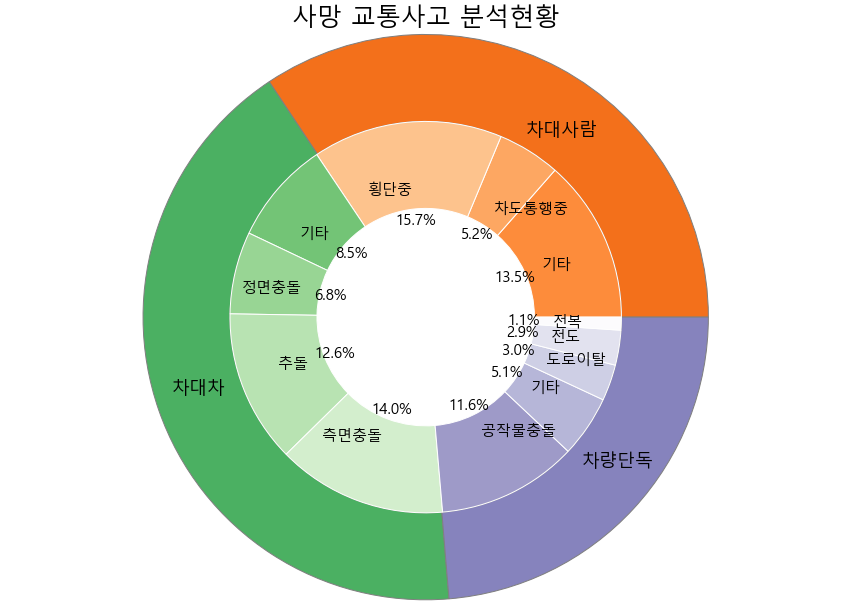

In [33]:
# Outside Ring
fig, ax = plt.subplots()
plt.title('사망 교통사고 분석현황', fontsize=25, pad= 20)
ax.axis('equal')
pie_outside, _ = ax.pie(group_sizes, 
                        radius=1.3, 
                        labels=group_names, 
                        labeldistance=0.75,
                        textprops={'size' : 18},
                        colors=[a(0.6), b(0.6), c(0.6)])

plt.setp(pie_outside, 
         width=width_num, 
         edgecolor='gray')

# Inside Ring
pie_inside, plt_labels, junk = \
    ax.pie(subgroup_sizes, 
           radius=(1.3 - width_num), 

           labels=subgroup_names, 

           labeldistance=0.65, 

           autopct='%.1f%%',
           
           pctdistance=0.5,

           colors=[a(0.5), a(0.4), a(0.3),

                   b(0.5), b(0.4), b(0.3), b(0.2), 

                   c(0.5), c(0.4),c(0.3), c(0.2),c(0,1)])

plt.setp(pie_inside, 

         width=width_num, 

         edgecolor='white')



plt.show()

# 분석그래프 3

In [34]:
df3 =pd.read_csv("C:/Users/rlawl/Downloads/도로교통공단_사망 교통사고 정보_20211231.csv",encoding= 'CP949')

In [35]:
df3

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X(UTMK),발생위치Y(UTMK),경도,위도
0,2021,2021-01-01 03:00,야,금,1,3,0,3,0,경북,...,추돌,안전운전 의무 불이행,교차로,교차로부근,승용차,승용차,1097010.0,1793385.0,128.578152,36.132653
1,2021,2021-01-01 09:00,주,금,1,0,0,0,0,충남,...,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,902369.0,1847109.0,126.408200,36.616845
2,2021,2021-01-01 15:00,주,금,1,0,0,0,0,강원,...,측면충돌,안전운전 의무 불이행,교차로,교차로내,원동기장치자전거,승용차,1123975.0,1974509.0,128.907483,37.761842
3,2021,2021-01-01 19:00,야,금,1,0,0,0,0,전남,...,횡단중,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,886507.0,1613961.0,126.263573,34.513391
4,2021,2021-01-01 21:00,야,금,1,0,0,0,0,경기,...,기타,기타,단일로,기타단일로,승용차,보행자,953522.0,1915403.0,126.976011,37.236327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,2021,2021-12-31 16:00,주,금,1,0,0,0,0,경북,...,정면충돌,안전운전 의무 불이행,교차로,교차로내,승용차,이륜차,1119020.0,1766895.0,128.818730,35.891434
2812,2021,2021-12-31 17:00,주,금,1,0,0,0,0,제주,...,추돌,안전운전 의무 불이행,단일로,기타단일로,화물차,화물차,940588.0,1503049.6,126.860248,33.517699
2813,2021,2021-12-31 18:00,야,금,1,0,0,0,0,강원,...,횡단중,보행자 보호의무 위반,단일로,기타단일로,승용차,보행자,1023127.0,1982332.0,127.762845,37.840465
2814,2021,2021-12-31 19:00,야,금,1,0,0,0,0,경북,...,횡단중,보행자 보호의무 위반,교차로,교차로횡단보도내,승용차,보행자,1058805.0,1824755.0,128.155943,36.418521


In [36]:
df3.columns

Index(['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X(UTMK)',
       '발생위치Y(UTMK)', '경도', '위도'],
      dtype='object')

In [37]:
df3 = df3[['발생년월일시','주야','요일','사망자수','사고유형_대분류']]

In [38]:
df3

,발생년월일시,주야,요일,사망자수,사고유형_대분류
0,2021-01-01 03:00,야,금,1,차대차
1,2021-01-01 09:00,주,금,1,차량단독
2,2021-01-01 15:00,주,금,1,차대차
3,2021-01-01 19:00,야,금,1,차대사람
4,2021-01-01 21:00,야,금,1,차대사람
...,...,...,...,...,...
2811,2021-12-31 16:00,주,금,1,차대차
2812,2021-12-31 17:00,주,금,1,차대차
2813,2021-12-31 18:00,야,금,1,차대사람
2814,2021-12-31 19:00,야,금,1,차대사람


In [39]:
group_df3 = df3.groupby(['요일','사고유형_대분류']).count()

In [40]:
group_df3['사망자수'].values

array([150, 197,  80, 157, 196,  96, 151, 172,  81, 144, 177, 112, 109,
       126, 105, 111, 142, 115, 145, 172,  78], dtype=int64)

In [41]:
week = ['월','화','수','목','금','토','일']

In [42]:
group_df3

발생년월일시   주야  사망자수
요일 사고유형_대분류                   
금  차대사람         150  150   150
   차대차          197  197   197
   차량단독          80   80    80
목  차대사람         157  157   157
   차대차          196  196   196
   차량단독          96   96    96
수  차대사람         151  151   151
   차대차          172  172   172
   차량단독          81   81    81
월  차대사람         144  144   144
   차대차          177  177   177
   차량단독         112  112   112
일  차대사람         109  109   109
   차대차          126  126   126
   차량단독         105  105   105
토  차대사람         111  111   111
   차대차          142  142   142
   차량단독         115  115   115
화  차대사람         145  145   145
   차대차          172  172   172
   차량단독          78   78    78

In [43]:
df3_pivot = df3.pivot_table(index= '요일',columns = '사고유형_대분류',values = '사망자수',aggfunc = 'count')

In [44]:
df3_pivot.index = week[::-1]

In [45]:
df3_pivot

사고유형_대분류,차대사람,차대차,차량단독
일,150,197,80
토,157,196,96
금,151,172,81
목,144,177,112
수,109,126,105
화,111,142,115
월,145,172,78


In [46]:
df3_freq = df3_pivot.div(df3_pivot.sum(axis=1),axis=0)*100

In [47]:
df3_freq['합계'] = df3_freq.sum(axis=1)

In [48]:
df3_freq

사고유형_대분류,차대사람,차대차,차량단독,합계
일,35.128806,46.135831,18.735363,100.0
토,34.966592,43.652561,21.380846,100.0
금,37.376238,42.574257,20.049505,100.0
목,33.256351,40.877598,25.866051,100.0
수,32.058824,37.058824,30.882353,100.0
화,30.163043,38.586957,31.250000,100.0
월,36.708861,43.544304,19.746835,100.0


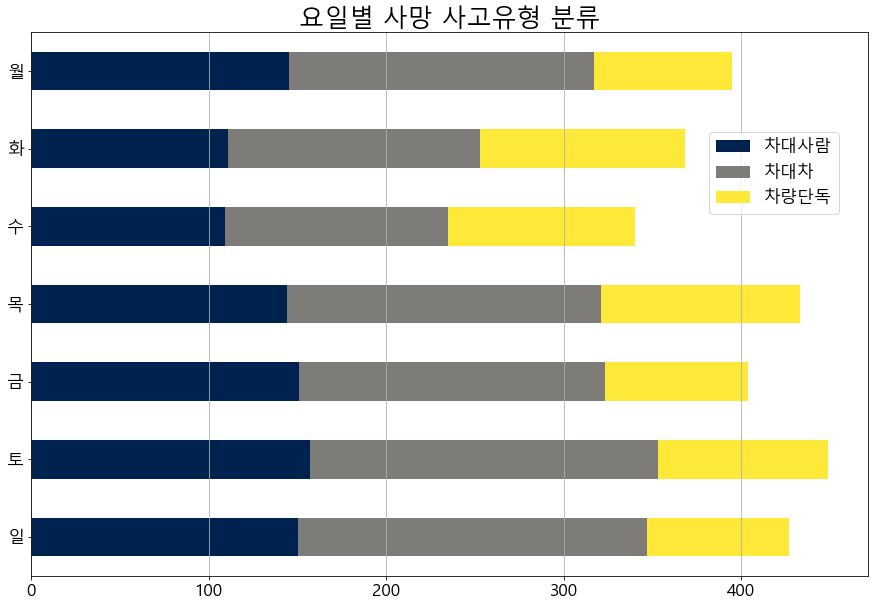

In [49]:
mpl.rcParams['font.size'] = 17

df3_pivot.plot(kind = 'barh',stacked = True ,colormap = 'cividis')
plt.title('요일별 사망 사고유형 분류',fontsize = 25)
plt.grid(axis='x')
plt.legend(loc='best',bbox_to_anchor = (0.8,0.65))

# 분석그래프 4

In [50]:
df4 =pd.read_csv("C:/Users/rlawl/Downloads/도로교통공단_사망 교통사고 정보_20211231.csv",encoding= 'CP949')

In [51]:
df4 = df4[['발생년월일시','경도','위도']]

In [52]:
lat = df4['위도'].mean()
long = df4['경도'].mean()

In [53]:
import folium

In [54]:
m = folium.Map([lat, long], zoom_start=7)
m

In [55]:
for i in df4.index:
    sub_lat = df4.loc[i, '위도']
    sub_long = df4.loc[i, '경도']
    
    title = df4.loc[i, '발생년월일시']
    
    #지도에 데이터 찍어서 보여주기
    folium.Circle([sub_lat, sub_long], color = '#f25d18', tooltip = title).add_to(m)
    
m.save("pointplotmap.html")
m

In [56]:
from folium.plugins import HeatMap
import branca.colormap as cm
import collections 

https://m.blog.naver.com/rackhunson/222402018261

In [57]:
color_map = cm.LinearColormap(
    colors=['blue', 'green', 'yellow', 'orange', 'red'],
    vmin=0.7, vmax=0.9
)

In [58]:
steps=100
gradient_map=collections.defaultdict(dict)
for i in range(steps):
    gradient_map[1/steps*i] = color_map.rgb_hex_str(1/steps*i)

In [59]:
m = folium.Map(location=[lat,long], tiles='openstreetmap', zoom_start=7)

# Add heatmap
HeatMap(
    data=df4[['위도', '경도']], 
    radius=13,
    gradient=gradient_map,
).add_to(m)

m.add_child(color_map)

# Display the map
m.save("heatmap.html")

# 분석그래프 6

In [196]:
df6=pd.read_csv("C:/Users/rlawl/Downloads/한국교통안전공단_자동차결함 리콜현황_20211231.csv",encoding= 'CP949')

In [197]:
df6 = df6[['제작자','차명','리콜개시일']]
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1962 entries, 0 to 1961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제작자     1962 non-null   object
 1   차명      1962 non-null   object
 2   리콜개시일   1962 non-null   object
dtypes: object(3)
memory usage: 46.1+ KB


In [198]:
df6['리콜월'] = df6['리콜개시일'].str[5:7]

In [199]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1962 entries, 0 to 1961
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제작자     1962 non-null   object
 1   차명      1962 non-null   object
 2   리콜개시일   1962 non-null   object
 3   리콜월     1962 non-null   object
dtypes: object(4)
memory usage: 61.4+ KB


In [200]:
df6['리콜월'] = pd.to_numeric(df6['리콜월'])

In [201]:
df6['차명'].unique()

array(['Rocket 3 R', 'Rocket 3 GT', '짚그랜드체로키', 'CRF1100', 'CRF1000',
       'BMW 525d xDrive', 'BMW 525d', 'BMW 520d xDrive',
       'BMW 520d Touring', 'BMW Gran Turismo 20d',
       'BMW Gran Turismo EfficientDynamics Edition', 'BMW X1 xDrive18d',
       'BMW X1 xDrive20d', 'BMW X1 xDrive23d', 'BMW X1 xDrive25d',
       'BMW X3 xDrive20d', 'MINI Cooper D', 'MINI Cooper D Clubman',
       'BMW 525d xDrive Touring', 'BMW 320d EffcientDynamicsEdition',
       'BMW 320d Gran Turismo', 'BMW 320d Touring', 'BMW 320d xDrive',
       'BMW 320d xDrive Gran Turismo', 'BMW 320d xDrive Touring',
       'BMW 325d', 'BMW 420d Coupe', 'BMW 420d Gran Coupe',
       'BMW 420d xDrive Coupe', 'BMW 420d xDrive Gran Coupe', 'BMW 520d',
       'BMW 118d', 'BMW 120d', 'BMW 220d Coupe', 'BMW 320d',
       'MINI Cooper SD Coupe', 'MINI Cooper SD Paceman ALL4',
       'MINI Cooper SD Paceman', 'MINI Cooper SD Countryman ALL4',
       'MINI Cooper SD Countryman', 'BMW 320d ED',
       'MINI Cooper SD Clubman',

In [208]:
df6_group = df6.groupby(['제작자']).count()

In [212]:
df6_group.sort_values('차명',ascending = False, inplace = True)

In [213]:
df6_group.index

Index(['비엠더블유코리아(주)', '메르세데스벤츠코리아(주)', '만트럭버스코리아(주)', '폭스바겐그룹코리아 주식회사',
       '혼다코리아(주)', '현대자동차(주)', '한불모터스(주)', '(주)볼보자동차코리아', '포드세일즈서비스코리아(유)',
       '(주)재규어랜드로버코리아', '스카니아코리아그룹(주)', '기아주식회사', '포르쉐코리아 주식회사', '다임러트럭코리아(주)',
       '기흥인터내셔널 유한회사', '한국토요타자동차(주)', '한국지엠(주)', '화창상사(주)', '유한회사 모토로싸',
       '스텔란티스코리아주식회사', '허스크바나모터싸이클코리아 주식회사', '대전기계공업(주)', '볼보트럭코리아(주)',
       '지엠코리아(주)', '진일엔지니어링 주식회사', '테슬라코리아 유한회사', '한국닛산(주)', '(주)에프엠케이',
       '자일대우버스 주식회사', '(주) 한국모터트레이딩', '(주)스즈키씨엠씨', '(주)스포츠모터사이클코리아',
       '큐로모터스(주)', '(주) 바이크코리아', '르노코리아자동차 주식회사', '명원아이앤씨(주)', '(주)테라모터스',
       '주식회사 케이에스티일렉트릭'],
      dtype='object', name='제작자')

<AxesSubplot:xlabel='리콜월', ylabel='제작자'>

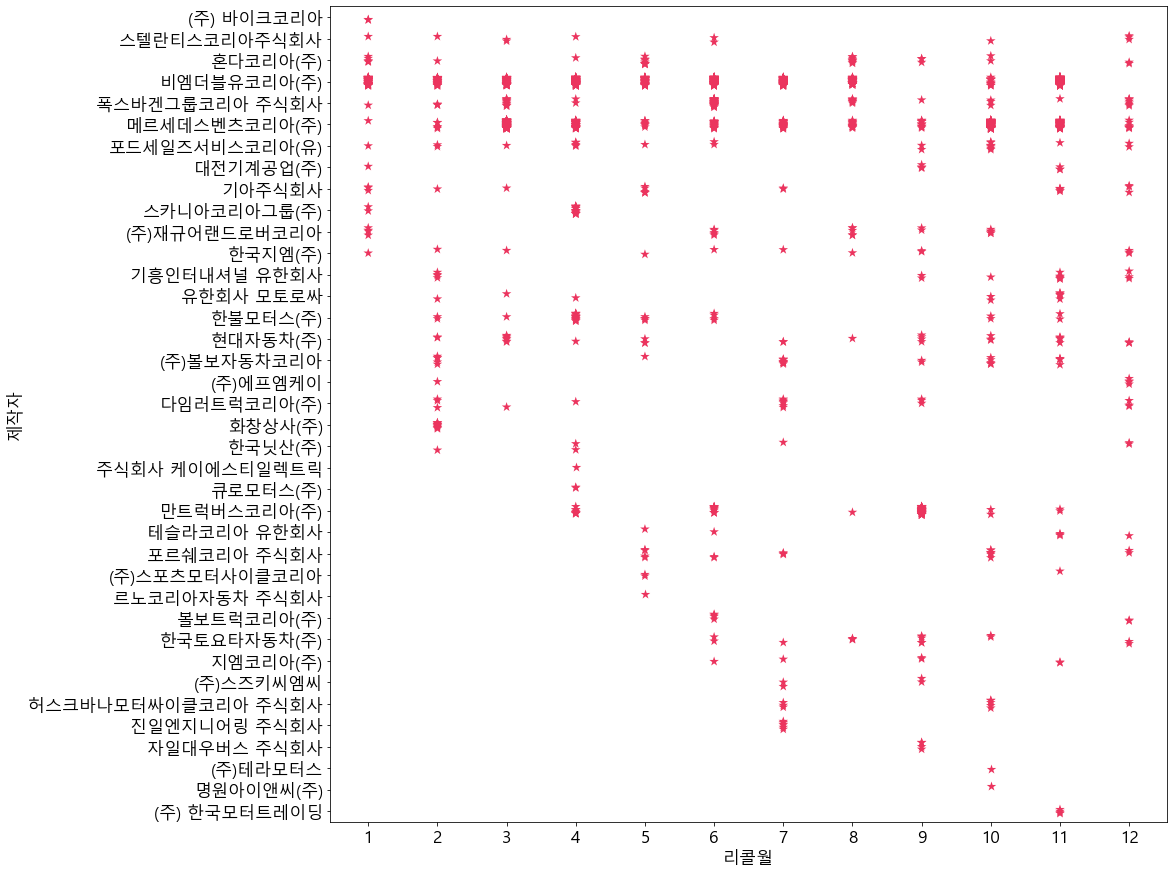

In [193]:
plt.figure(figsize=(15,15))
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
sns.stripplot(x='리콜월', y='제작자',data = df6 ,color = '#eb345e',marker = '*',size =10,jitter =0.2)

In [215]:
df6_group = df6_group.iloc[:20]

In [222]:
df6_group = df6_group.sort_values('차명',ascending = True)

Text(0.5, 1.0, '10개 이상의 리콜을 진행한 회사 리콜현황')

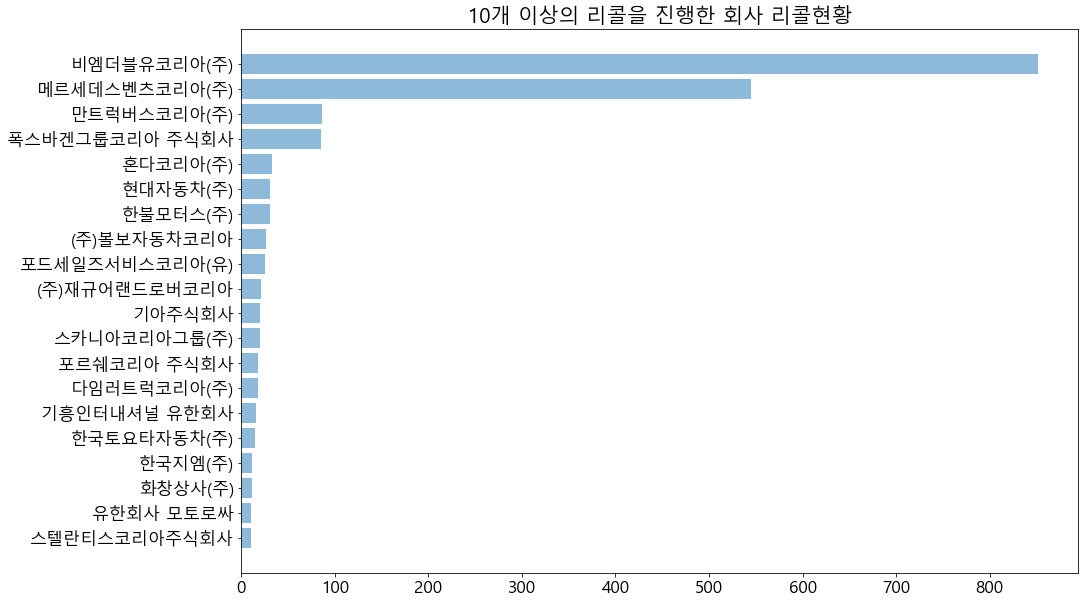

In [224]:
plt.barh(df6_group.index,df6_group['차명'],alpha =0.5)
plt.title('10개 이상의 리콜을 진행한 회사 리콜현황')